In [ ]:
# C: 支持向量机中对应的惩罚参数。

# kernel: 核函数，linear, poly, rbf, sigmoid, precomputed 可选，下文详细介绍。

# degree: poly 多项式核函数的指数。

# tol: 收敛停止的容许值。

# decision_function_shape : 多分类时使用
# - decision_function_shape='ovo'：代表一对一法。
# - decision_function_shape='ovr'：代表一对多法。

# sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)

In [ ]:
# 非完全线性数据处理：支持向量机中，当训练数据集并非完全线性可分时，这样在保证每个点都被正确分开后会造成过拟合
# - 正类混合到负类中了，无法通过一条线进行划分

# 解决：引入惩罚因子 Σ，即参数 C ，允许少部分的点出错
# 处理不完全线性只能使几何间隔尽可能的大，同时使误分类点的个数尽量小，C 则是调合二者的系数
# 最大间隔有两种
# 「软间隔」： 可以容许零星噪声数据被误分类
#  「硬间隔」：能将数据完美分开的最大间隔


In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

%matplotlib inline

x, y = make_blobs(n_samples=60, centers=2, random_state=30, cluster_std=0.8)  # 生成示例数据

In [3]:
from sklearn.svm import SVC

linear_svc = SVC(kernel="linear")
linear_svc.fit(x, y)

SVC(kernel='linear')

In [4]:
linear_svc.support_vectors_ # 一共有 3 个支持向量，刚好完美划分两类

array([[ 2.57325754, -3.92687452],
       [ 2.49156506, -5.96321164],
       [ 4.62473719, -6.02504452]])

In [8]:
import numpy as np

def svc_plot(model):
    # 获取到当前 Axes 子图数据，并为绘制分割线做准备
    ax = plt.gca()
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 50)
    y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # 使用轮廓线方法绘制分割线
    ax.contour(X, Y, P, colors="green", levels=[-1, 0, 1], linestyles=["--", "-", "--"])

    # 标记出支持向量的位置
    ax.scatter(
        model.support_vectors_[:, 0], model.support_vectors_[:, 1], c="green", s=100
    )

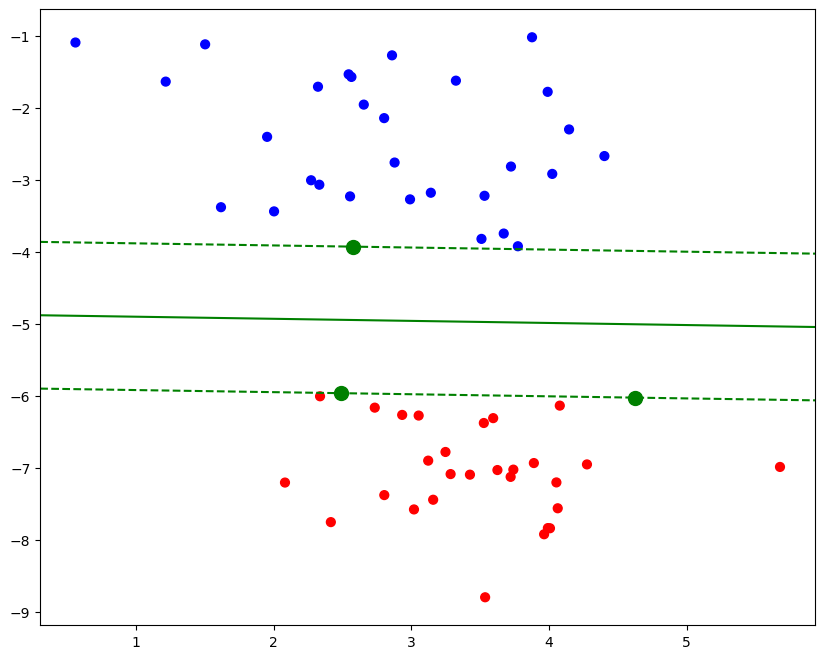

In [9]:
# 绘制最大间隔支持向量图
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")
svc_plot(linear_svc)

In [ ]:
##### 加入噪声时处理

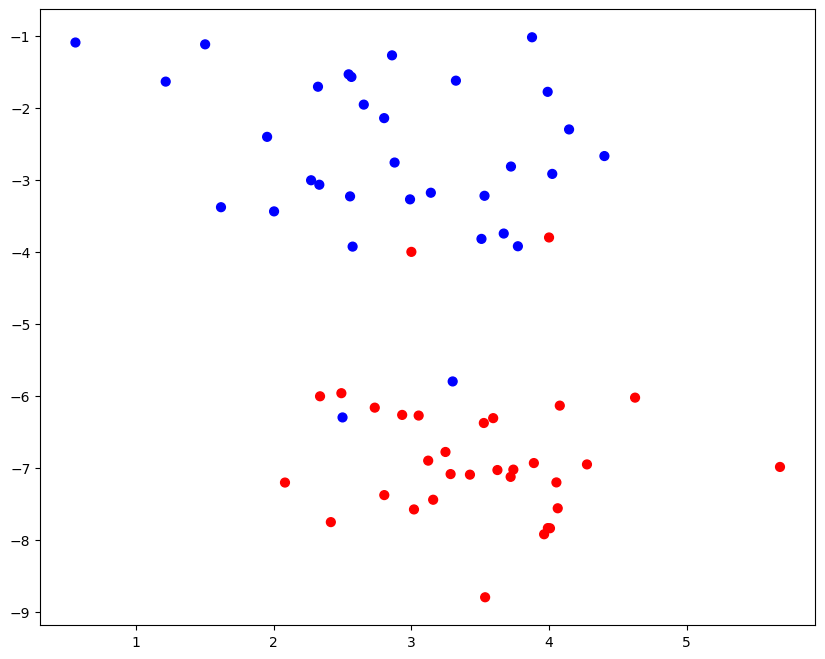

In [10]:
# 向原数据集中加入噪声点
x = np.concatenate((x, np.array([[3, -4], [4, -3.8], [2.5, -6.3], [3.3, -5.8]])))
y = np.concatenate((y, np.array([1, 1, 0, 0])))

plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")

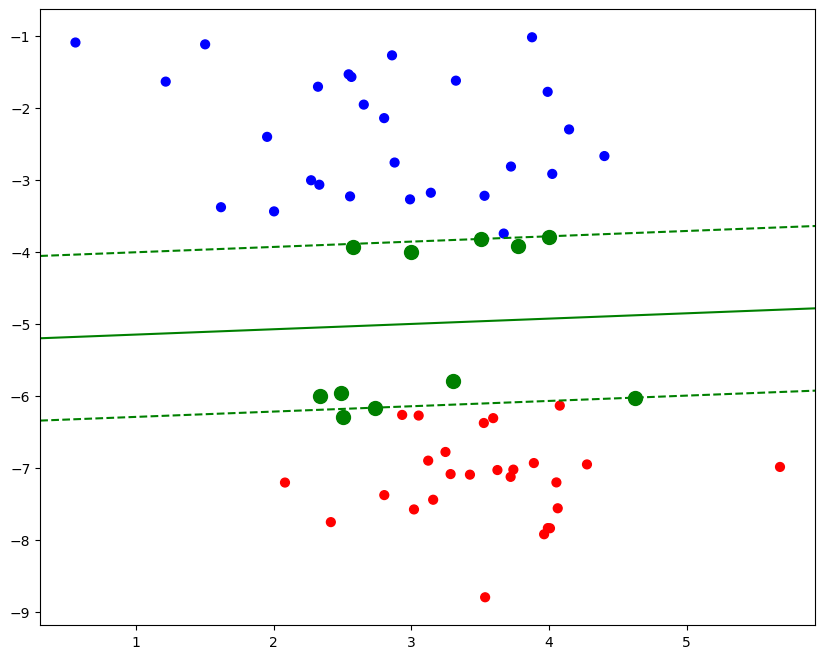

In [11]:
linear_svc.fit(x, y)  # 训练

plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")
svc_plot(linear_svc)
# 噪声点的混入，此时支持向量的数量由原来的 3 个变成了 11 个

In [12]:
# 加入惩罚参数，控制分割线

from ipywidgets import interact
import ipywidgets as widgets


def change_c(c):
    linear_svc.C = c
    linear_svc.fit(x, y)
    plt.figure(figsize=(10, 8))
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")
    svc_plot(linear_svc)


interact(change_c, c=[1, 10000, 1000000])

interactive(children=(Dropdown(description='c', options=(1, 10000, 1000000), value=1), Output()), _dom_classes…

<function __main__.change_c(c)>